# Prediction of Treatment of Down Syndrome in Mice by Evaluating the Effectiveness of Protein Type using ML 

Objective 1: Learn various steps and due diligence needed to train successful classification models.

Background: Some experiments were conducted onmice to see if a treatment of Down’s syndrome works or not.
Mice were divided into control and diseased (genotype), treated or untreated and whether it shows a particular
behavior or not (treatment_behavior). Readings for 77 proteins were recorded for the mice, but some of the
readings were discarded if they seemed unreliable (out of range). Your job is to develop a pre-processing pipeline
and a classifier, and also find out which subset of proteins is important in predicting which class.

# Part A: Learn various steps and due diligence needed to train successful classification models.

Task 1: 
Let your code read the data directly from https://www.ee.iitb.ac.in/~asethi/Dump/MouseTrain.csv

Task 2: 
Perform exploratory data analysis to find out:
 1.Which variables are usable, and which are not?
 2.Are there significant correlations among variables?
 3.Are the classes balanced?

Task 3: 
Develop a strategy to deal with missing variables. You can choose to impute the variable. The recommended
way is to use multivariate feature imputation (https://scikit-learn.org/stable/modules/impute.html)

Task 4: 
Select metrics that you will use, such as accuracy, F1 score, balanced accuracy, AUC etc. Remember, you
have two separate classification tasks– one is binary, the other has four classes. You may have to do some
reading about multi-class classification metrics.

Task 5: 
Using five-fold cross-validation (you can use GridSearchCV from scikit-learn) to find the reasonable (I cannot
say “best” because you have two separate classifications to perform) hyper-parameter settings for the
following model types:
a.Linear SVM with regularization as hyperparameter
b. RBFkernel SVM with kernel width and regularization as hyperparameters
c. Neural network with single ReLU hidden layer and Softmax output (hyperparameters: number of neurons, weight decay)
d. Randomforest (max tree depth, max number of variables per node)

Task 6:
Check feature importance for each model to see if the same proteins are important for each model. Read up
on howtofind feature importance.

Task 7:
See if removing some features systematically will improve your models (e.g. using recursive feature
elimination https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html).

Task 8:
Finally, test a few promising models on the test data:
https://www.ee.iitb.ac.in/~asethi/Dump/MouseTest.csv

# Part B: Practice using pre-trained neural networks to extract domain-specific features for new tasks 

# Part A

# Importing libraries

In [1]:
import numpy as np                                       #importing numpy library for performing linear algebra operation                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
import pandas as pd                                      #importing pandas for reading the csv file of data set which is mousetrain
from sklearn.feature_selection import VarianceThreshold  #importing variance threshold for finding column with low variance 
import matplotlib.pyplot as plt                          # importing the matplotlibrary for plotting the graph
%matplotlib inline

# Task 1: Loading Dataset

### Reading data directly from https://www.ee.iitb.ac.in/~asethi/Dump/MouseTrain.csv

In [ ]:
"""We will use the pandas library for loading the dataset.
The dataset is about mice having two classification one is 'genotype' with control and diseased classes and other is 'treatment behaviour'
in that four classes is present.The total feature are 77""" 
Micetrain_data=pd.read_csv("https://www.ee.iitb.ac.in/~asethi/Dump/MouseTrain.csv")#loading the mousetrain data using pandas library

In [3]:
Micetrain_data.head()   #seeing the five rows of data with all feature

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine_C/S
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine_C/S
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine_C/S
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine_C/S
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,NaN,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine_C/S


The dataset contain the 762 sample with 79 rows.
77 columns are proteins as a feature with last 2 rows is classification target.
In classification target first one is binary classification i.e 'control','diseased' and other is multi classification .


In [4]:
#binary classification values
Micetrain_data.Genotype.unique()     #using the unique feature of pandas library

array(['Control', 'Ts65Dn'], dtype=object)

In [5]:
#multiclassification values
Micetrain_data.Treatment_Behavior.unique()

array(['Memantine_C/S', 'Memantine_S/C', 'Saline_C/S', 'Saline_S/C'],
      dtype=object)

# Task 2: Basic information from data and statistics of the data

Performing exploratory data analysis to find out:

 1. Which variables are usable, and which are not?

 2. Are there significant correlations among variables?

 3. Are the classes balanced?

In [6]:
#finding the statistics of the data 
Micetrain_data.describe()        #using describe keyword of pandas

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,...,762.000000,582.000000,567.000000,762.000000,702.000000,762.000000,612.000000,582.000000,582.000000,762.000000
mean,0.437715,0.629456,0.319844,2.311905,3.882665,0.232722,0.182514,3.513055,0.212083,1.447201,...,0.226365,0.156693,0.136973,0.122095,0.129689,0.450260,0.166017,0.182322,0.206105,1.357954
std,0.275175,0.274954,0.046536,0.342923,0.929202,0.039521,0.026548,1.268395,0.031066,0.510631,...,0.029564,0.030299,0.029633,0.014928,0.022832,0.062304,0.059256,0.041938,0.058118,0.337107
min,0.170634,0.264085,0.194160,1.414914,1.794716,0.063236,0.064043,1.369898,0.112812,0.429032,...,0.162642,0.088305,0.080657,0.067254,0.085419,0.258626,0.079691,0.105537,0.101787,0.586479
25%,0.294759,0.481011,0.290199,2.069609,3.186726,0.206446,0.165306,2.424669,0.190616,1.213118,...,0.205750,0.136188,0.116234,0.110655,0.111676,0.407385,0.124382,0.152365,0.164155,1.075929
50%,0.371534,0.569058,0.317696,2.309711,3.800418,0.229032,0.181405,3.319506,0.210077,1.347557,...,0.224439,0.150386,0.131542,0.122600,0.126138,0.450500,0.153342,0.174184,0.191754,1.351277
75%,0.486749,0.700621,0.346747,2.534053,4.471656,0.255064,0.197664,4.493452,0.233947,1.542629,...,0.241714,0.170685,0.150942,0.133617,0.142831,0.488438,0.195401,0.205146,0.235925,1.616752
max,2.516367,2.602662,0.497160,3.757641,8.482553,0.434624,0.317066,6.947290,0.306247,6.113347,...,0.358289,0.282016,0.261506,0.158748,0.210908,0.759588,0.479763,0.360692,0.413903,2.129791


In [7]:
#finding the rows and column of data
Micetrain_data.shape

(762, 79)

There is total 79 columns from which
independent columns=77
dependent columns=2

### 2.1 Checking usable variables

In [9]:
#finding the feature with non null values
Micetrain_data.info()#info keyword of pandas library

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 79 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DYRK1A_N            762 non-null    float64
 1   ITSN1_N             762 non-null    float64
 2   BDNF_N              762 non-null    float64
 3   NR1_N               762 non-null    float64
 4   NR2A_N              762 non-null    float64
 5   pAKT_N              762 non-null    float64
 6   pBRAF_N             762 non-null    float64
 7   pCAMKII_N           762 non-null    float64
 8   pCREB_N             762 non-null    float64
 9   pELK_N              762 non-null    float64
 10  pERK_N              762 non-null    float64
 11  pJNK_N              762 non-null    float64
 12  PKCA_N              762 non-null    float64
 13  pMEK_N              762 non-null    float64
 14  pNR1_N              762 non-null    float64
 15  pNR2A_N             762 non-null    float64
 16  pNR2B_N 

From all the variable there is some variable which contain the null values 
.BAD_N contain the 180 null values and BCL2_N contain the 195 null values ,pCFOS_N contain the 60 null values ,H3AcK18_N contain the 150 null values ,EGR1_N contain the 180 null values,H3MeK4_N contain the 180 null values.

In [10]:
#number of nullvalues in each feature
Micetrain_data.isnull().sum()        #sum keywords of pandas dataframe

DYRK1A_N                0
ITSN1_N                 0
BDNF_N                  0
NR1_N                   0
NR2A_N                  0
                     ... 
EGR1_N                180
H3MeK4_N              180
CaNA_N                  0
Genotype                0
Treatment_Behavior      0
Length: 79, dtype: int64

In [11]:
#finding total number of null values
Micetrain_data.isnull().sum().sum()

np.int64(979)

There is total 979 values which are null .I will not delete the all null values I will use the impute function to put mean values into the null values.


In [12]:
#as dataset containing the target values we have to seperate the train and target value for prediction of model
#as now dataset is updated so new data is stored in Micetrain_dataup with seperate target values
#target values is stored in Geno_t which is binary classification and in Treat_B with four different classes
Micetrain_dataup=Micetrain_data.drop(labels=['Genotype','Treatment_Behavior'],axis=1)#drop the target values
Geno_t=Micetrain_data['Genotype']#binary class is stored in Geno_t
Treat_B=Micetrain_data['Treatment_Behavior']#multiclass is stored in Treat_B

dropping the dependent variable from the independent dataset

In [13]:
#feature selector that remove low variance feature 
#source:https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html
#source:https://youtu.be/uMlU2JaiOd8
var_thrs=VarianceThreshold(threshold=0.001)# given threshold of 0.001 feature whose datset are almost equal 
var_thrs.fit(Micetrain_dataup)


VarianceThreshold(threshold=0.001)

In [14]:
#finding the non constant feature
sum(var_thrs.get_support())#sum of all non constant feature

np.int64(58)

In [15]:
#finding length of non constant feature
len(Micetrain_dataup.columns[var_thrs.get_support()])#same as sum function here len function is used instead of sum function

58

In [16]:
#storing the low variance columns into the lowvar_columns and then dropping for avoiding the overfitting of the data
lowvar_columns=[column for column in Micetrain_dataup.columns#using for loop for the finding the low variance columns
                if column not in Micetrain_dataup.columns[var_thrs.get_support()]]#using the if condition for the getting low variance feature
print(len(lowvar_columns))#printing the result

19


there is total 19 columns which is having variance threshold of 0.001

In [17]:
#showing the all the columns which are low variance 
for column in lowvar_columns:# for loop is used for checking the lowvar columns
    print(column)#printing the result

pBRAF_N
pCREB_N
CREB_N
RSK_N
NUMB_N
pGSK3B_N
BAX_N
ARC_N
ERBB4_N
nNOS_N
GFAP_N
GluR4_N
P3525_N
SNCA_N
SHH_N
BAD_N
BCL2_N
pS6_N
pCFOS_N


In [18]:
#drooping the low variance feature from the datsets to avoid overfitting
Micetrain_dataup1=Micetrain_dataup.drop(lowvar_columns,axis=1)#drop feature is used to drop the feature

after dropping the feature of low variance now there is 58 columns are present


In [19]:
Micetrain_dataup1.head()#dataset is checked after dropping the feature 

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pCAMKII_N,pELK_N,pERK_N,pJNK_N,...,IL1B_N,pCASP9_N,PSD95_N,Ubiquitin_N,pGSK3B_Tyr216_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,2.373744,1.750936,0.687906,0.306382,...,0.430957,1.603310,2.014875,1.044979,0.831557,0.427099,0.114783,0.131790,0.128186,1.675652
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,2.292150,1.596377,0.695006,0.299051,...,0.457156,1.671738,2.004605,1.009883,0.849270,0.441581,0.111974,0.135103,0.131119,1.743610
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,2.283337,1.561316,0.677348,0.291276,...,0.510472,1.663550,2.016831,0.996848,0.846709,0.435777,0.111883,0.133362,0.127431,1.926427
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,2.152301,1.595086,0.583277,0.296729,...,0.430996,1.484624,1.957233,0.990225,0.833277,0.391691,0.130405,0.147444,0.146901,1.700563
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,2.134014,1.504230,0.550960,0.286961,...,0.481227,1.534835,2.009109,0.997775,0.878668,0.434154,0.118481,0.140314,0.148380,1.839730


### 2.2 Correlations among variables


correlation matrix for checking the relation between the features

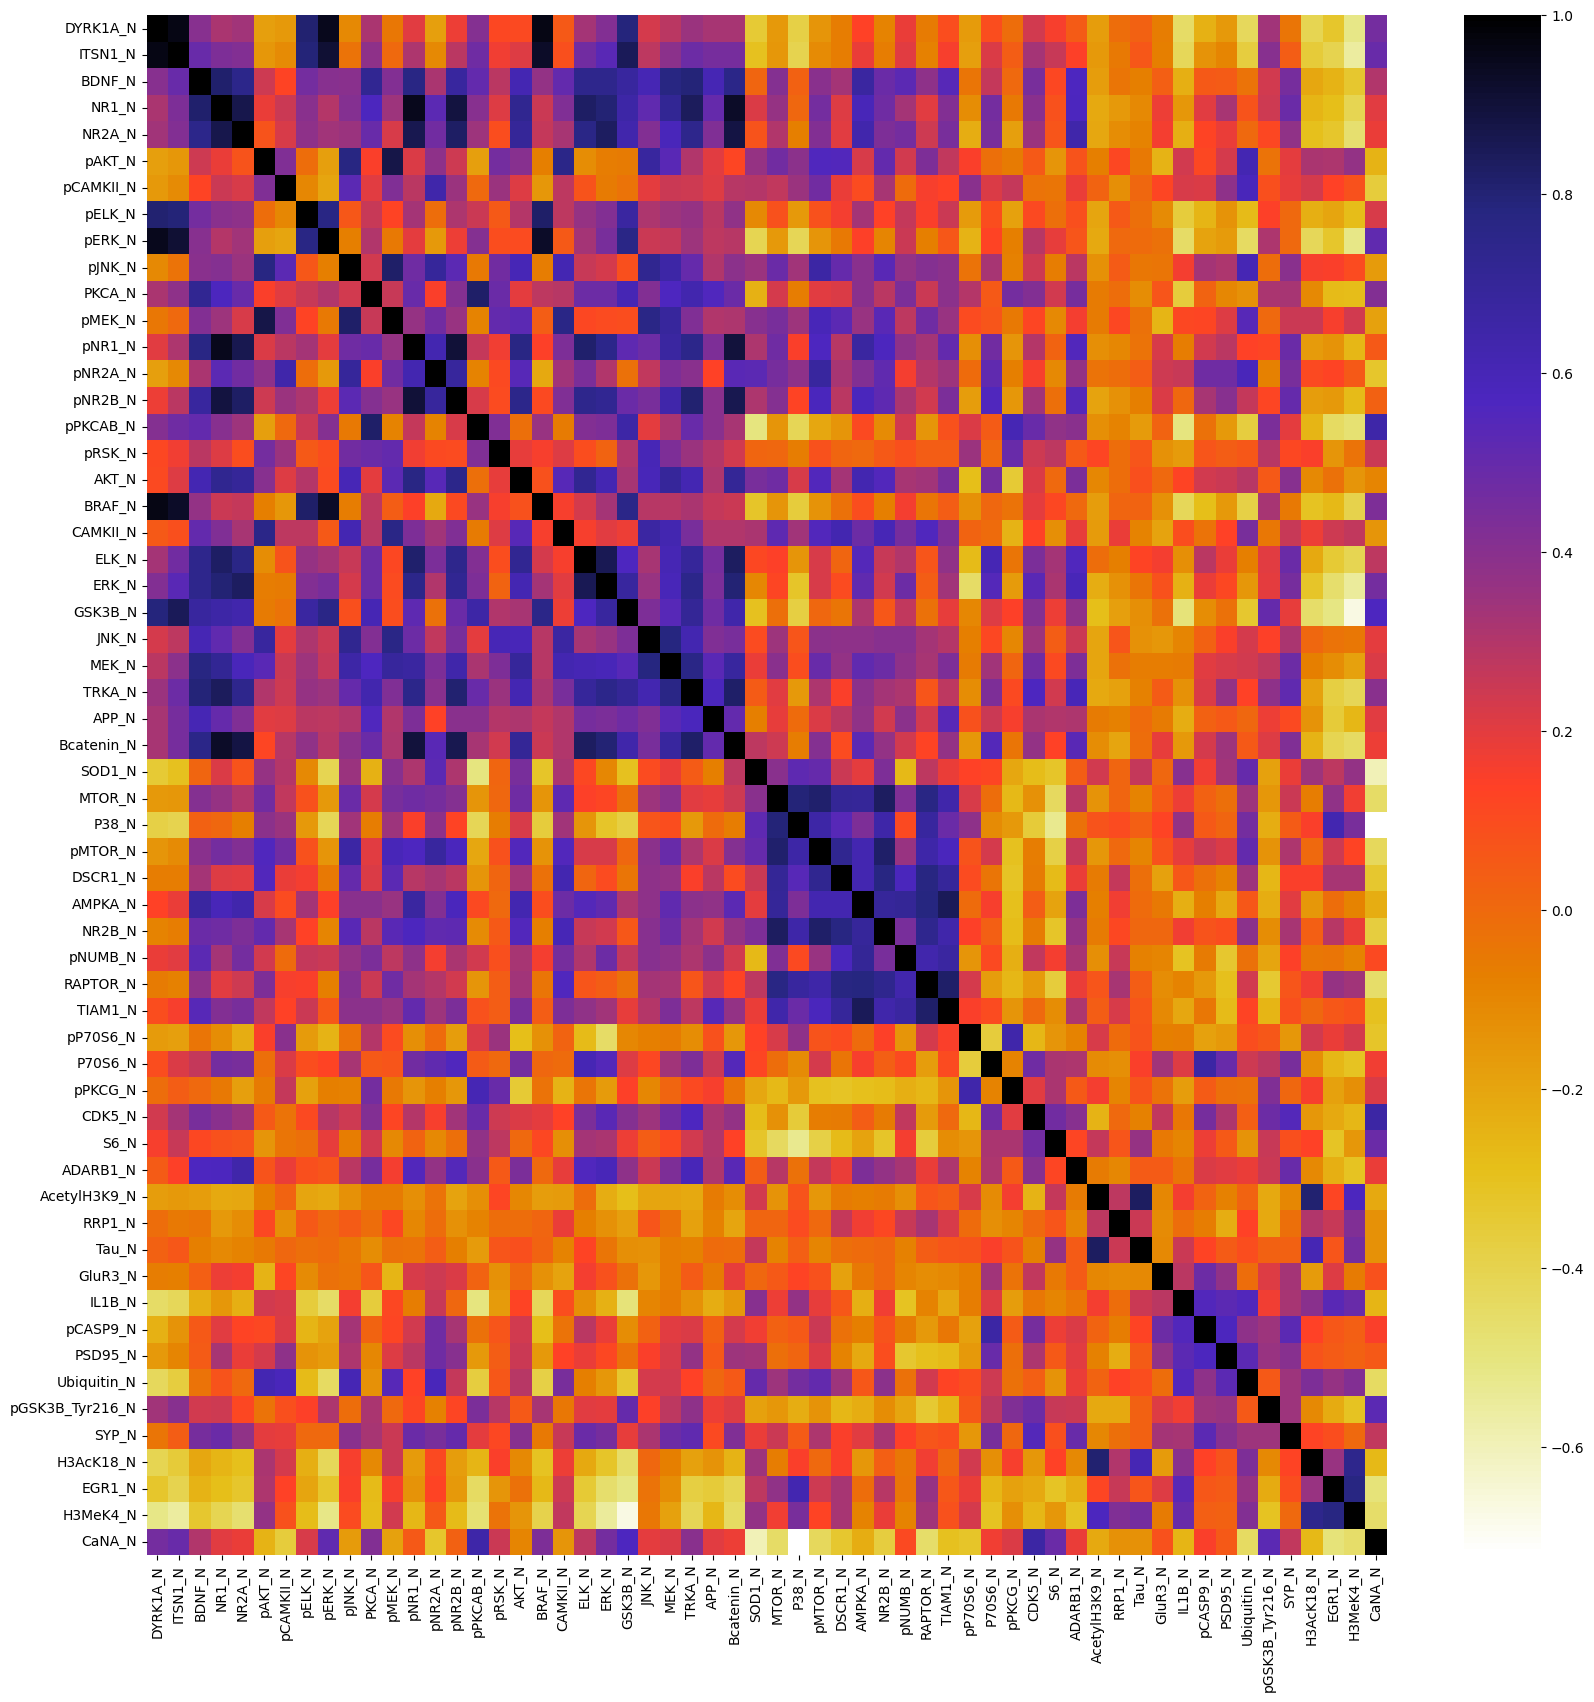

In [20]:
#importing the seaborn for drawing the heatmap
import seaborn as sns
plt.figure(figsize=(20,20))#figsize is given
corr=Micetrain_dataup1.corr()#correlation is computed between the feature 
sns.heatmap(corr,annot=False, cmap=plt.cm.CMRmap_r)#heatmap function with color function
plt.show()#plotted the result

In [ ]:
corre_matrix=Micetrain_dataup1.corr()#storing the correlation is correlation matrix

In [ ]:
len(corre_matrix.columns)#number of feature which are shown in correlation matrix


58

In [ ]:
# function for selecting the highly correlated feature with threshold value =0.9
def correlated(Micetrain_dataup1,threshold):
    feat_corr=set()
    corre_matrix=Micetrain_dataup1.corr()
    for i in range(len(corre_matrix.columns)):
        for j in range(i):
            if abs(corre_matrix.iloc[i,j]) > threshold:
                col_name=corre_matrix.columns[i]
                feat_corr.add(col_name)
    return feat_corr

In [ ]:
corr_features= correlated(Micetrain_dataup1, 0.9)#number of feature which are correlated with value 0.9
len(set(corr_features))

6

In [ ]:
corr_features#name of feature is given

{'BRAF_N', 'Bcatenin_N', 'ITSN1_N', 'pERK_N', 'pNR1_N', 'pNR2B_N'}

In [ ]:
Micetrain_dataup2=Micetrain_dataup1.drop(corr_features,axis=1)#using the drop feature to drop the data

In [ ]:
len(Micetrain_dataup2.columns)#after dropping final feature remaining after preprocessing

52

after checking the correlation there is 6 feature which are correlated with value 0.9 so I had dropped it and final feature which will be used for the Ml is 52

### 2.3 Balance of classes

Checking that the class is balaced for both target variable

Text(0, 0.5, 'Frequency')

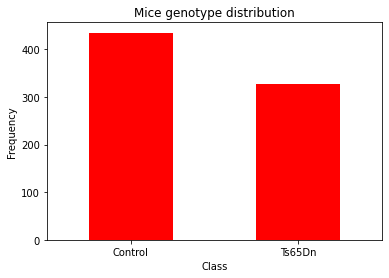

In [ ]:
#counting the classes freqency for binary data
count_class=pd.value_counts(Micetrain_data['Genotype'],sort=True)#it will count the genotype binary datatype
count_class.plot(kind='bar',rot=0,color='Red')#ploting the bar graph of red color for both value
plt.title("Mice genotype distribution")#giving the title name
plt.xlabel("Class")#giving name of label of x axis
plt.ylabel("Frequency")#giving name of label of y axis

In [ ]:
count_class=pd.value_counts(Micetrain_data['Genotype'],sort=True)
print(count_class)

Control    435
Ts65Dn     327
Name: Genotype, dtype: int64


as seen from the graph that genotype is having balanced class approximately both having the same value .classes will be imblanced when one class has the frequency less than 2:1 ,but here there is not like that so for this class is balanced 

Therefore the class is balanced 

Text(0, 0.5, 'Frequency')

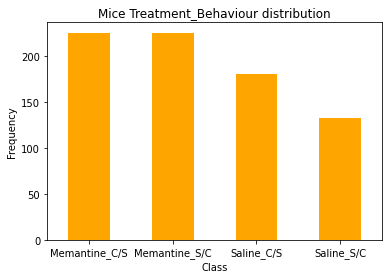

In [ ]:
#counting the frequency for multiclass data
count_class=pd.value_counts(Micetrain_data['Treatment_Behavior'],sort=True)#counting the value of treatment behaviour
count_class.plot(kind='bar',rot=0,color='orange')#it will draw the bargraph of orange color
plt.title("Mice Treatment_Behaviour distribution")#giving the title name
plt.xlabel("Class")#giving name of label of x axis
plt.ylabel("Frequency")#giving name of label of y axis

In [ ]:
count_class=pd.value_counts(Micetrain_data['Treatment_Behavior'],sort=True)
print(count_class)

Memantine_C/S    225
Memantine_S/C    225
Saline_C/S       180
Saline_S/C       132
Name: Treatment_Behavior, dtype: int64


here also the treatment bheaviour has all the four classes balanced as frequency is not less than 2:1

All the classes is balanced 

Here its shown that feature which contain the missing value shown in yellow color .

<AxesSubplot:>

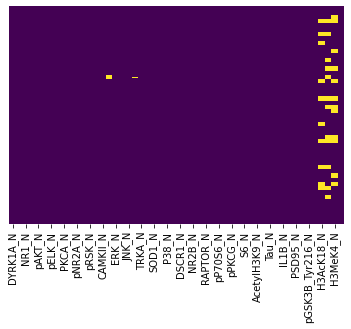

In [ ]:
sns.heatmap(Micetrain_dataup2.isnull(),yticklabels=False,cbar=False,cmap='viridis')# here I had check that which variable has stored the null values 

# Task 3: Data imputation

Strategy to deal with missing variable:Multivariate feature imputation

In [ ]:
#importing the Library for data imputation
from sklearn.experimental import enable_iterative_imputer#from skelearn import the enable the iterative imputer
from sklearn.impute import IterativeImputer#importing the interaive imputer 

In [ ]:
#filling the mean value of non null value to null values
Impute=IterativeImputer()#defined the function for the iterative imputer 
Imputed=Impute.fit_transform(Micetrain_dataup2)#fitted the imputed function to the dataset

In [ ]:
#array made after imputation stored in mice dataset for filling the null values
Micetrain_dataup2Impute=pd.DataFrame(Imputed, columns=Micetrain_dataup2.columns)#pd.dataframe is used to tranfer the imputed value to the final dataset

In [ ]:
Micetrain_dataup2Impute.isnull().sum().sum()#here after imputation i had checked that is there any null values is remained after imputation 

0

In [ ]:
Micetrain_dataup2Impute.isnull().sum()#checking the null values into the all feature 

DYRK1A_N           0
BDNF_N             0
NR1_N              0
NR2A_N             0
pAKT_N             0
pCAMKII_N          0
pELK_N             0
pJNK_N             0
PKCA_N             0
pMEK_N             0
pNR2A_N            0
pPKCAB_N           0
pRSK_N             0
AKT_N              0
CAMKII_N           0
ELK_N              0
ERK_N              0
GSK3B_N            0
JNK_N              0
MEK_N              0
TRKA_N             0
APP_N              0
SOD1_N             0
MTOR_N             0
P38_N              0
pMTOR_N            0
DSCR1_N            0
AMPKA_N            0
NR2B_N             0
pNUMB_N            0
RAPTOR_N           0
TIAM1_N            0
pP70S6_N           0
P70S6_N            0
pPKCG_N            0
CDK5_N             0
S6_N               0
ADARB1_N           0
AcetylH3K9_N       0
RRP1_N             0
Tau_N              0
GluR3_N            0
IL1B_N             0
pCASP9_N           0
PSD95_N            0
Ubiquitin_N        0
pGSK3B_Tyr216_N    0
SYP_N        

Converting the string value of target variable into the numerical value using the label encoder function

In [ ]:
from sklearn.preprocessing import LabelEncoder#importing the label encoder from skelearn 
encoder=LabelEncoder()#defining the encoder function 
Geno_t=encoder.fit_transform(Geno_t)#encoding the output variable genotype 
Treat_B =encoder.fit_transform(Treat_B)#encoding the output variable treatment bheaviour 


Splitting the train and test dataset

In [ ]:
from sklearn.model_selection import train_test_split#importing the library for the train test split
#I have divided the train and test set into the 70:30 ratio means 70% data is in training set and 30% data into the test dataset 
X_train,X_test,Y1_train,Y1_test,Y2_train,Y2_test=train_test_split(Micetrain_dataup2Impute,Geno_t,Treat_B,test_size=0.3,random_state=73)

# Model 4: Checking Accurcay ,F1_score,AUC on KNN Classifier model result


In [ ]:
#call the classifier
from sklearn.neighbors import KNeighborsClassifier# importing the kneighbours classifier model
md=KNeighborsClassifier()#defining the model
md.fit(X_train,Y1_train)#fitting the data for the training the model
Y1_pred=md.predict(X_test)#predicting the output using the model

In [ ]:
from sklearn.metrics import accuracy_score#importing the accuracy score from the sklearn library 
result1=accuracy_score(Y1_test,Y1_pred)#comparing the test and prediction
print('Accuracy is:',result1*100)#printing the accuracy 

Accuracy is: 93.01310043668121


In [ ]:
from sklearn.metrics import classification_report#importing the f1_score from sklearn 
cr=classification_report(Y1_test,Y1_pred)#predicting the test and prediction
print(cr)# printing the result of f1_score


              precision    recall  f1-score   support

           0       0.95      0.93      0.94       132
           1       0.91      0.93      0.92        97

    accuracy                           0.93       229
   macro avg       0.93      0.93      0.93       229
weighted avg       0.93      0.93      0.93       229



In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score# importing the roc_auc _score from sklearn
Y1_score = md.predict(X_test)#predicting the y1

In [ ]:
fp,tp,threshold=roc_curve(Y1_test,Y1_score)#comparing the roc score for the test and predicted data

In [ ]:
print('roc_auc_score: ',roc_auc_score(Y1_test,Y1_score))#printing the result for the roc_auc curve

roc_auc_score:  0.9298266166822868


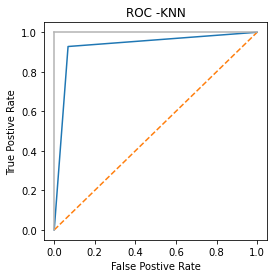

In [ ]:
plt.subplots(1,figsize=(4,4))#determining the figsize
plt.title('ROC -KNN')#giving the title name 
plt.plot(fp,tp)#plotting the test and prediction
plt.plot([0,1],ls="--")
plt.plot([0,0],[1,0],c="0.7"),plt.plot([1,1], c="0.7")
plt.ylabel('True Postive Rate')#giving the name for y axis label 
plt.xlabel('False Postive Rate')#giving the name for the x axis label 
plt.show()#plotting the figure 

as from the above analysis the accuracy is higher for the accuracy and f1_score so for the checking the prediction of the model I will use the F1_score and accuracy.

# Task 5:  Implimenting Models

### Model 1 : Linear SVM (Binary Classification)

Implimented model with some default parameters, check accuracy and updates model parameters using gridsearch


In [ ]:
X=Micetrain_dataup2#storing the data in X label
Y1=Geno_t#storing the binary classes into the y1 label
Y2=Treat_B#storing the multi class into the y2 label

In [ ]:
#as output variable is in string so we have to convert this into the some numerical data which is in categorical form .so for this we will use the labelencoder
encoder=LabelEncoder()#defining the labelencoder function
Y1=encoder.fit_transform(Y1)#encoding the y1 output variable 
Y2=encoder.fit_transform(Y2)#encoding the y2 output variable 

In [ ]:
Impute=IterativeImputer()#defining the imputing function of x train datset
Imputed1=Impute.fit_transform(X_train)#imputing the xtrain dataset
Imputed2=Impute.fit_transform(X_test)#imputing the xtest dataset
X_train=pd.DataFrame(Imputed1, columns=X_train.columns)#tranferring the imputed dataset into the x train by pd dataframe
X_test=pd.DataFrame(Imputed2, columns=X_test.columns)#tranferring the imputed dataset into the x test by pd dataframe


In [ ]:
#cross validation used with linear svm model
from sklearn import svm #importing the svm from the sklearn
from sklearn.model_selection import cross_val_score#importing the cross_val_score
clf = svm.SVC(kernel='linear', C=1, random_state=42)#defining the linear svm model with some default parameter
scores = cross_val_score(clf, X_train,Y1_train, cv=5)#determining score of the model

In [ ]:
cross_val_score#printing the parameters for cross_val_score

<function sklearn.model_selection._validation.cross_val_score(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=nan)>

In [ ]:
 print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))#accuracy before selecting best parameter
    

0.90 accuracy with a standard deviation of 0.03


In [ ]:
clf.fit(X_train,Y1_train)#fitting the linear svm model 

SVC(C=1, kernel='linear', random_state=42)

In [ ]:
Y1_pred=clf.predict(X_test)#prediction is done using linear svm model

In [ ]:
from sklearn.metrics import accuracy_score#importing the accuracy score from the sklearn library
result1=accuracy_score(Y1_test,Y1_pred)#predicting the test and prediction
print('Accuracy is:',result1*100)#printing the accuracy 

Accuracy is: 90.39301310043668


In [ ]:
from sklearn.metrics import classification_report#importing the f1_score from sklearn 
cr=classification_report(Y1_test,Y1_pred)#predicting the test and prediction
print(cr)# printing the result of f1_score

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       132
           1       0.97      0.79      0.88        97

    accuracy                           0.90       229
   macro avg       0.92      0.89      0.90       229
weighted avg       0.91      0.90      0.90       229



Accuracy before the selecting best hyperparameter is almost 90%

In [ ]:
#Applying Grid Search to find best model
from sklearn.model_selection import GridSearchCV#importing the grid search library from the sklearn library 
parameters=[{'C':[1,10,100,1000],'kernel':['linear']}]#giving some value of regularized parameter and kernel value 
       
grid_search= GridSearchCV(estimator=clf,
                         param_grid=parameters,
                         scoring='accuracy',
                         cv=5,
                         n_jobs=-1)#giving the some parameter value to the grid search cv
grid_search=grid_search.fit(X_train,Y1_train)#fitting the linear svm model using the best hyperparameter

In [ ]:
accuracy=grid_search.best_score_#determing the accuracy of the grid search 

In [ ]:
accuracy#printing the result 

0.9736907071063303

In [ ]:
grid_search.best_params_#printing the best hyperparameter

{'C': 100, 'kernel': 'linear'}

In [ ]:
clf=svm.SVC(kernel='linear', C=100)#again defining the linear svm but this time with the hyparameter which is find using the grid search
scores = cross_val_score(clf, X_train,Y1_train, cv=5)#determing the score of model

In [ ]:
 print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))#accuracy after selecting the best parameter which is increased

0.97 accuracy with a standard deviation of 0.02


In [ ]:
clf.fit(X_train,Y1_train)#again fitted data with the new hyparameter

SVC(C=100, kernel='linear')

In [ ]:
Y1_pred=clf.predict(X_test)#prediction using the new hyparameter 

In [ ]:
from sklearn.metrics import accuracy_score#importing the accuracy score from the sklearn library
result1=accuracy_score(Y1_test,Y1_pred)#predicting the test and prediction
print('Accuracy is:',result1*100)#printing the accuracy 

Accuracy is: 94.32314410480349


In [ ]:
from sklearn.metrics import classification_report#importing the f1_score from sklearn 
cr=classification_report(Y1_test,Y1_pred)#predicting the test and prediction
print(cr)# printing the result of f1_score

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       132
           1       0.95      0.92      0.93        97

    accuracy                           0.94       229
   macro avg       0.94      0.94      0.94       229
weighted avg       0.94      0.94      0.94       229



### Model 1: Linear SVM (Multiclass classification)

In [ ]:
from sklearn import svm #importing the svm from the sklearn
from sklearn.model_selection import cross_val_score#importing the cross_val_score
clf = svm.SVC(kernel='linear', C=10, random_state=42)#defining the linear svm model with some default parameter
scores = cross_val_score(clf, X_train,Y2_train, cv=5)#determing the score of model

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))#accuracy before selecting best parameter

0.96 accuracy with a standard deviation of 0.02


In [ ]:
clf.fit(X_train,Y2_train)#fitting the linear svm model 

SVC(C=10, kernel='linear', random_state=42)

In [ ]:
Y2_pred=clf.predict(X_test)#prediction is done using linear svm model

In [ ]:
from sklearn.metrics import classification_report#importing the f1_score from sklearn 
cr=classification_report(Y2_test,Y2_pred)#predicting the test and prediction
print(cr)# printing the result of f1_score

              precision    recall  f1-score   support

           0       0.99      0.95      0.97        73
           1       1.00      1.00      1.00        70
           2       0.92      0.98      0.95        46
           3       1.00      1.00      1.00        40

    accuracy                           0.98       229
   macro avg       0.98      0.98      0.98       229
weighted avg       0.98      0.98      0.98       229



In [ ]:
#Applying Grid Search to find best model
from sklearn.model_selection import GridSearchCV#importing the grid search library from the sklearn library 
parameters=[{'C':[1,10,100,1000],'kernel':['linear']}]#giving some value of regularized parameter and kernel value 
      
grid_search= GridSearchCV(estimator=clf,
                         param_grid=parameters,
                         scoring='accuracy',
                         cv=5,
                         n_jobs=-1)
grid_search=grid_search.fit(X_train,Y2_train)#fitting the linear svm model using the best hyperparameter

In [ ]:
accuracy=grid_search.best_score_#determining the accuracy of the grid search 

In [ ]:
accuracy#printing the result of the accuracy of the grid search 

0.9680832304708165

In [ ]:
grid_search.best_params_#printing the best hyperparameter


{'C': 1000, 'kernel': 'linear'}

In [ ]:
clf=svm.SVC(kernel='linear', C=1000)#again defining the linear svm but this time with the hyparameter which is find using the grid
scores = cross_val_score(clf, X_train,Y2_train, cv=5)#determing the score of model

In [ ]:
 print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))#accuracy after selecting the best parameter

0.97 accuracy with a standard deviation of 0.01


In [ ]:
clf.fit(X_train,Y2_train)#again fitted data with the new hyparameter

SVC(C=1000, kernel='linear')

In [ ]:
Y2_pred=clf.predict(X_test)#prediction using the new hyparameter

In [ ]:
from sklearn.metrics import accuracy_score#importing the accuracy score from the sklearn library
result1=accuracy_score(Y2_test,Y2_pred)#predicting the test and prediction
print('Accuracy is:',result1*100)#printing the accuracy 

Accuracy is: 98.2532751091703


In [ ]:
from sklearn.metrics import classification_report#importing the f1_score from sklearn 
cr=classification_report(Y2_test,Y2_pred)#predicting the test and prediction
print(cr)# printing the result of f1_score

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        73
           1       1.00      1.00      1.00        70
           2       1.00      0.91      0.95        46
           3       1.00      1.00      1.00        40

    accuracy                           0.98       229
   macro avg       0.99      0.98      0.98       229
weighted avg       0.98      0.98      0.98       229



### Model 2: SVM with RBF Kernal(Binary classification)


In [ ]:
#cross validation used with Kernel svm model
from sklearn import svm#importing the svm from the sklearn
from sklearn.model_selection import cross_val_score#importing the cross_val_score
clf2 = svm.SVC(kernel='rbf', C=1, random_state=42)#defining the linear svm model with some default parameter
scores = cross_val_score(clf2, X_train,Y1_train, cv=5)#determining score of the model

In [ ]:
clf2.fit(X_train,Y1_train)#fitting the kernel  svm model 

SVC(C=1, random_state=42)

In [ ]:
Y1_pred=clf2.predict(X_test)#prediction is done using kernel svm model

In [ ]:
from sklearn.metrics import classification_report#importing the f1_score from sklearn
cr=classification_report(Y1_test,Y1_pred)#predicting the test and prediction
print(cr)# printing the result of f1_score

              precision    recall  f1-score   support

           0       0.69      0.93      0.79       132
           1       0.82      0.42      0.56        97

    accuracy                           0.72       229
   macro avg       0.75      0.68      0.67       229
weighted avg       0.74      0.72      0.69       229



In [ ]:
from sklearn.model_selection import GridSearchCV#importing the grid search library from the sklearn library 
parameters=[{'C':[1,10,100,1000],'kernel':['rbf'], 'gamma':[0.01,0.1,1 ]}]#giving some value of regularized parameter and kernel value and gamma value
       
grid_search= GridSearchCV(estimator=clf2,
                         param_grid=parameters,
                         scoring='accuracy',
                         cv=5,
                         n_jobs=-1)
grid_search=grid_search.fit(X_train,Y1_train)#fitting the kernel  svm model using the best hyperparameter

In [ ]:
accuracy=grid_search.best_score_#determining the accuracy of the grid search 

In [ ]:
grid_search.best_params_#printing the best hyperparameter

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

In [ ]:
clf2=svm.SVC(kernel='rbf', C=1000,gamma=0.01)#defining the kernel svm model with some default parameter
scores = cross_val_score(clf, X_train,Y1_train, cv=5)#determining score of the model

In [ ]:
clf2.fit(X_train,Y1_train)#fitting the kernel  svm model 

SVC(C=1000, gamma=0.01)

In [ ]:
Y1_pred=clf2.predict(X_test)#predicting the result 

In [ ]:
from sklearn.metrics import accuracy_score#importing the accuracy score from the sklearn library
result1=accuracy_score(Y1_test,Y1_pred)#predicting the test and prediction
print('Accuracy is:',result1*100)#printing the accuracy 

Accuracy is: 97.37991266375546


In [ ]:
from sklearn.metrics import classification_report#importing the f1_score from sklearn
cr=classification_report(Y1_test,Y1_pred)#predicting the test and prediction
print(cr)# printing the result of f1_score

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       132
           1       0.97      0.97      0.97        97

    accuracy                           0.97       229
   macro avg       0.97      0.97      0.97       229
weighted avg       0.97      0.97      0.97       229



### Model 2: SVM with RBF Kernal(Multiclass classification)

In [ ]:
#cross validation used with kernel svm model
from sklearn import svm#importing the linear svm model
from sklearn.model_selection import cross_val_score#importing the cross value score 
clf2 = svm.SVC(kernel='rbf', C=1, random_state=42)#defining the kernel rbf 
scores = cross_val_score(clf, X_train,Y2_train, cv=5)#defining the score 

In [ ]:
clf2.fit(X_train,Y2_train)#fitting the model on training dataset 

SVC(C=1, random_state=42)

In [ ]:
Y2_pred=clf2.predict(X_test)#predicting the output using the model

In [ ]:
from sklearn.metrics import classification_report#importing the f1_score 
cr=classification_report(Y2_test,Y2_pred)#comparing the test and prediction
print(cr)#printing the accuracy 

              precision    recall  f1-score   support

           0       0.93      0.90      0.92        73
           1       0.89      0.91      0.90        70
           2       0.85      0.89      0.87        46
           3       0.84      0.80      0.82        40

    accuracy                           0.89       229
   macro avg       0.88      0.88      0.88       229
weighted avg       0.89      0.89      0.89       229



In [ ]:
from sklearn.model_selection import GridSearchCV#importing the grid search library from the sklearn library 
parameters=[{'C':[1,10,100,1000],'kernel':['rbf'], 'gamma':[0.01,0.1,1 ]}]#giving some value of regularized parameter and kernel
        
grid_search= GridSearchCV(estimator=clf2,
                         param_grid=parameters,
                         scoring='accuracy',
                         cv=5,
                         n_jobs=-1)
grid_search=grid_search.fit(X_train,Y2_train)#fitting the kernel  svm model using the best hyperparameter

In [ ]:
accuracy=grid_search.best_score_#determining the accuracy of the grid search 


In [ ]:
grid_search.best_params_#printing the best hyperparameter

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

In [ ]:
clf2=svm.SVC(kernel='rbf', C=100,gamma=0.1)#defining the kernel svm using the best hyperparameter
scores = cross_val_score(clf2, X_train,Y2_train, cv=5)#defining the score 

In [ ]:
clf2.fit(X_train,Y2_train)#fitting the model on training data

SVC(C=100, gamma=0.1)

In [ ]:
Y2_pred=clf2.predict(X_test)#prediction using the best hyperparameter

In [ ]:
from sklearn.metrics import accuracy_score#importing the accuracy score from the sklearn library
result1=accuracy_score(Y2_test,Y2_pred)#predicting the test and prediction
print('Accuracy is:',result1*100)#printing the accuracy 

Accuracy is: 100.0


In [ ]:
from sklearn.metrics import classification_report#importing the f1_score 
cr=classification_report(Y2_test,Y2_pred)#comparing the test and prediction
print(cr)#printing the accuracy 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       1.00      1.00      1.00        70
           2       1.00      1.00      1.00        46
           3       1.00      1.00      1.00        40

    accuracy                           1.00       229
   macro avg       1.00      1.00      1.00       229
weighted avg       1.00      1.00      1.00       229



After comparing the accuracy before and after selecting hyperparameter there is increase in accuracy which is 100%

###   Model 3: Neural Network(Binary classification)


Neural network with single ReLU hidden layer and Softmax output (hyperparameters: number of
neurons, weight decay)

In [ ]:
import tensorflow as tf#importing the tensorflow as tf
from keras.wrappers.scikit_learn import KerasClassifier#importing the kerasclassifier 
from keras.models import Sequential#importing the sequential 
from keras.layers import Dense#importing the dense
from keras.regularizers import l2#importing the l2 regularizer

In [ ]:
def model(Neurons=32,weight_decay=0.001):#defining the model with neurons and weight decay as hyperparameter
    classifier = Sequential()
    classifier.add(Dense(units=Neurons, activation = 'relu',kernel_regularizer=l2(weight_decay)))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = 'RMSprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier#returning the classifier
    

In [ ]:
kc=KerasClassifier(build_fn=model,epochs=10,batch_size=1)#defining the keras classifier 



<ipython-input-107-3eb1547e0421>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  kc=KerasClassifier(build_fn=model,epochs=10,batch_size=1)#defining the keras classifier


In [ ]:
para_grid={'Neurons':[32, 64, 128, 256, 512],#defining the parameter for the neurons and weight decay 
            'weight_decay':[0.0001,0.001,0.01,0.1,1],
          }
Gs3=GridSearchCV(estimator=kc, param_grid=para_grid, cv=5)#using the grid search 
best_model_bin = Gs3.fit(X_train, Y1_train)#fitting the data 

Epoch 1/10
426/426 [==============================] - 5s 5ms/step - loss: 0.6725 - accuracy: 0.5939
Epoch 2/10
426/426 [==============================] - 2s 4ms/step - loss: 0.6470 - accuracy: 0.6221
Epoch 3/10
426/426 [==============================] - 1s 3ms/step - loss: 0.6301 - accuracy: 0.6244
Epoch 4/10
426/426 [==============================] - 1s 3ms/step - loss: 0.6164 - accuracy: 0.6573
Epoch 5/10
426/426 [==============================] - 1s 3ms/step - loss: 0.6061 - accuracy: 0.6643
Epoch 6/10
426/426 [==============================] - 1s 3ms/step - loss: 0.6035 - accuracy: 0.6784
Epoch 7/10
426/426 [==============================] - 2s 4ms/step - loss: 0.5992 - accuracy: 0.6784
Epoch 8/10
426/426 [==============================] - 2s 5ms/step - loss: 0.5788 - accuracy: 0.7207
Epoch 9/10
426/426 [==============================] - 1s 3ms/step - loss: 0.5642 - accuracy: 0.7254
Epoch 10/10
107/107 [==============================] - 0s 1ms/step - loss: 0.6126 - accuracy: 0.6449

In [ ]:
accuracy=Gs3.best_score_##determining the accuracy of the grid search 


In [ ]:
accuracy#determining the accuracy of grid search 

0.7486157774925232

In [ ]:
Gs3.best_params_#printing the best parameter

{'Neurons': 256, 'weight_decay': 0.0001}

In [ ]:
Y1_pred=best_model_bin.predict(X_test)#predicting the output using the model 

8/8 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import accuracy_score#importing the accuracy score from the sklearn library
result1=accuracy_score(Y1_test,Y1_pred)#predicting the test and prediction
print('Accuracy is:',result1*100)#printing the accuracy 

Accuracy is: 68.99563318777294


In [ ]:
from sklearn.metrics import classification_report#importing the f1_score
cr=classification_report(Y1_test,Y1_pred)#comparing the test and prediction
print(cr)#printing the accuracy 

              precision    recall  f1-score   support

           0       0.66      0.96      0.78       132
           1       0.86      0.32      0.47        97

    accuracy                           0.69       229
   macro avg       0.76      0.64      0.62       229
weighted avg       0.74      0.69      0.65       229



accuracy is 70%

###   Model 3: Neural Network(Multiclass classification)

In [ ]:
para_grid={'Neurons':[32, 64, 128, 256, 512],#defining the parameter for the neurons and weight decay 
            'weight_decay':[0.001,0.001,0.01,0.1,1],
          }
Gs4=GridSearchCV(estimator=kc, param_grid=para_grid, cv=5)#using the grid search 
best_model_multi= Gs4.fit(X_train, Y2_train)#fitting the data 

Epoch 1/10
426/426 [==============================] - 1s 2ms/step - loss: -1.6702 - accuracy: 0.3028
Epoch 2/10
426/426 [==============================] - 1s 3ms/step - loss: -5.6899 - accuracy: 0.3028
Epoch 3/10
426/426 [==============================] - 1s 3ms/step - loss: -11.3968 - accuracy: 0.3028
Epoch 4/10
426/426 [==============================] - 1s 2ms/step - loss: -19.0659 - accuracy: 0.3028
Epoch 5/10
426/426 [==============================] - 1s 2ms/step - loss: -28.7465 - accuracy: 0.3028
Epoch 6/10
426/426 [==============================] - 1s 2ms/step - loss: -40.1446 - accuracy: 0.3028
Epoch 7/10
426/426 [==============================] - 1s 2ms/step - loss: -53.1001 - accuracy: 0.3028
Epoch 8/10
426/426 [==============================] - 1s 2ms/step - loss: -68.0144 - accuracy: 0.3028
Epoch 9/10
426/426 [==============================] - 1s 2ms/step - loss: -84.5833 - accuracy: 0.3028
Epoch 10/10
107/107 [==============================] - 0s 2ms/step - loss: -228.8610

In [ ]:
accuracy=Gs4.best_score_##determining the accuracy of the grid search 

In [ ]:
accuracy#printing the accuracy of grid search 


0.2909892380237579

In [ ]:
Gs4.best_params_#printing the best parameter

{'Neurons': 32, 'weight_decay': 0.001}

In [ ]:
Y2_pred=best_model_multi.predict(X_test)#predicting the model

8/8 [==============================] - 0s 3ms/step


In [ ]:
from sklearn.metrics import accuracy_score#importing the accuracy score from the sklearn library
result1=accuracy_score(Y2_test,Y2_pred)#predicting the test and prediction
print('Accuracy is:',result1*100)#printing the accuracy 

Accuracy is: 30.567685589519648


In [ ]:
from sklearn.metrics import classification_report#importing the f1_score
cr=classification_report(Y2_test,Y2_pred)#comparing the test and prediction
print(cr)#printing the result 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        73
           1       0.31      1.00      0.47        70
           2       0.00      0.00      0.00        46
           3       0.00      0.00      0.00        40

    accuracy                           0.31       229
   macro avg       0.08      0.25      0.12       229
weighted avg       0.09      0.31      0.14       229



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy = 31% - Low Accuracy

### Model 4: Random Forest(Binary classification)

In [ ]:
from sklearn.ensemble import RandomForestClassifier#importing the random forest classifier


In [ ]:
mod = RandomForestClassifier(criterion="gini",max_depth=8,min_samples_split=10,random_state=56)#giving default parameter to the model
mod.fit(X_train, Y1_train)#fitting the data
  
# predicting the model
Y1_pred = mod.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report#importing the f1_score
cr2=classification_report(Y1_test,Y1_pred)#comparing the test and prediction
print(cr2)#pritning the result 

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       132
           1       0.97      0.96      0.96        97

    accuracy                           0.97       229
   macro avg       0.97      0.97      0.97       229
weighted avg       0.97      0.97      0.97       229



In [ ]:
param_grid = {
            'max_depth': [3, 6, 9],#giving some values to the max_depth 
            'min_samples_split':[0.1,0.2,0.3,]#giving some values to min_samples_split

}

In [ ]:
Gs = GridSearchCV(RandomForestClassifier(),#grid search for model
                           param_grid=param_grid,cv=5)
Gs.fit(X_train, Y1_train)#fitting the model on train dataset
print(Gs.best_estimator_)#printing the best estimator 


RandomForestClassifier(max_depth=9, min_samples_split=0.1)


In [ ]:
accuracy=Gs.best_score_#printing the accuracy of grid search 

In [ ]:
mod_up=RandomForestClassifier(criterion="gini",max_depth=9,min_samples_split=0.1,random_state=56)#defining the model with best  hyperparameter
mod_up.fit(X_train,Y1_train)#fitting the model 
  
# predict the mode
Y1_pred = mod_up.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score#importing the accuracy score from the sklearn library
result1=accuracy_score(Y1_test,Y1_pred)#predicting the test and prediction
print('Accuracy is:',result1*100)#printing the accuracy 

Accuracy is: 92.57641921397381


In [ ]:
from sklearn.metrics import classification_report#importing the f1_score 
cr2=classification_report(Y1_test,Y1_pred)#comparing the test and predict 
print(cr2)#printing the result 

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       132
           1       0.93      0.90      0.91        97

    accuracy                           0.93       229
   macro avg       0.93      0.92      0.92       229
weighted avg       0.93      0.93      0.93       229



accuracy is 93%

### Model 4: Random Forest(Multiclass classification)

In [ ]:
mod = RandomForestClassifier(criterion="gini",max_depth=8,min_samples_split=10,random_state=56)#giving default parameter to the model
mod.fit(X_train, Y2_train)#fitting the data
  
# predict the mode
Y2_pred = mod.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report#importing the f1_score 
cr2=classification_report(Y2_test,Y2_pred)#comparing the test and predict
print(cr2)#printing the result 

              precision    recall  f1-score   support

           0       0.99      0.95      0.97        73
           1       0.97      1.00      0.99        70
           2       0.94      0.98      0.96        46
           3       1.00      0.97      0.99        40

    accuracy                           0.97       229
   macro avg       0.97      0.97      0.97       229
weighted avg       0.97      0.97      0.97       229



In [ ]:
param_grid = {
            'max_depth': [3, 6, 9,8],#giving some values to the max_depth
            'min_samples_split':[0.1,0.2,0.3]#giving some values to min_samples_split

}

In [ ]:
Gs = GridSearchCV(RandomForestClassifier(),#grid search for model
                           param_grid=param_grid,cv=5)
Gs.fit(X_train, Y2_train)#fitting the model on train dataset
print(Gs.best_estimator_)#printing the best estimator 

RandomForestClassifier(max_depth=8, min_samples_split=0.1)


In [ ]:
accuracy=Gs.best_score_#printing the accuracy of grid search 

In [ ]:
mod_up_2 = RandomForestClassifier(max_depth=8, min_samples_split=10)#defining the model with best  hyperparameter

mod_up_2.fit(X_train, Y2_train)#fitting the model 
  
# predict the mode
Y2_pred = mod_up_2.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score#importing the accuracy score from the sklearn library
result1=accuracy_score(Y2_test,Y2_pred)#predicting the test and prediction
print('Accuracy is:',result1*100)#printing the accuracy 

Accuracy is: 96.94323144104804


In [ ]:
from sklearn.metrics import classification_report#importing the f1_score
cr2=classification_report(Y2_test,Y2_pred)#comparing the test and predict
print(cr2)#printing the result 

              precision    recall  f1-score   support

           0       0.99      0.92      0.95        73
           1       0.99      1.00      0.99        70
           2       0.90      0.98      0.94        46
           3       1.00      1.00      1.00        40

    accuracy                           0.97       229
   macro avg       0.97      0.97      0.97       229
weighted avg       0.97      0.97      0.97       229



accuracy is 97%

# Task 6: Checking feature importance for each model

### Model 1: Linear svm(Binary classification)

In [ ]:
pd.isnull(X).sum() > 0 #checking that is there any null value in feature

DYRK1A_N           False
BDNF_N             False
NR1_N              False
NR2A_N             False
pAKT_N             False
pCAMKII_N          False
pELK_N             False
pJNK_N             False
PKCA_N             False
pMEK_N             False
pNR2A_N            False
pPKCAB_N           False
pRSK_N             False
AKT_N              False
CAMKII_N           False
ELK_N               True
ERK_N              False
GSK3B_N            False
JNK_N              False
MEK_N               True
TRKA_N             False
APP_N              False
SOD1_N             False
MTOR_N             False
P38_N              False
pMTOR_N            False
DSCR1_N            False
AMPKA_N            False
NR2B_N             False
pNUMB_N            False
RAPTOR_N           False
TIAM1_N            False
pP70S6_N           False
P70S6_N            False
pPKCG_N            False
CDK5_N             False
S6_N               False
ADARB1_N           False
AcetylH3K9_N       False
RRP1_N             False


In [ ]:
Impute=IterativeImputer()#using the imputation for filling the null values 
Imputed=Impute.fit_transform(X)
X=pd.DataFrame(Imputed, columns=X.columns)


In [ ]:
from sklearn import svm#importing the linear svm 
from sklearn.feature_selection import SelectFromModel#importing the select from model 

In [ ]:
clf=svm.SVC(kernel='linear', C=100)#defining the linear svm 
selector = SelectFromModel(estimator=clf.fit(X,Y1),prefit=True)#selecting the feature according to importance 

In [ ]:
var_=list(np.take(X.columns,np.where(selector.get_support()==True)[0]))#list of variable that is important 

In [ ]:
imp=selector.get_support(indices=True)#indices of the important feature 

In [ ]:
print(imp)#printing the result 

[ 1  4  7  8  9 12 13 14 19 20 21 23 26 29 30 31 39 41 46 47 49]


In [ ]:
var_#printing the varaible name 

['BDNF_N',
 'pAKT_N',
 'pJNK_N',
 'PKCA_N',
 'pMEK_N',
 'pRSK_N',
 'AKT_N',
 'CAMKII_N',
 'MEK_N',
 'TRKA_N',
 'APP_N',
 'MTOR_N',
 'DSCR1_N',
 'pNUMB_N',
 'RAPTOR_N',
 'TIAM1_N',
 'RRP1_N',
 'GluR3_N',
 'pGSK3B_Tyr216_N',
 'SYP_N',
 'EGR1_N']

In [ ]:
pd.DataFrame({'important binary feature indices':imp,'Important Binary Features':var_})

,important binary feature indices,Important Binary Features
0,1,BDNF_N
1,4,pAKT_N
2,7,pJNK_N
3,8,PKCA_N
4,9,pMEK_N
5,12,pRSK_N
6,13,AKT_N
7,14,CAMKII_N
8,19,MEK_N
9,20,TRKA_N


In [ ]:
clf.coef_#coefficent of the variable 

array([[  5.86214677,  -6.63140537,  -2.64381371,  -0.23039622,
          6.16809594,  -0.72584801,  -1.82124991,  -8.10183233,
          8.33815824,  -6.17033512,   2.01043076,  -0.80417131,
         -6.07954113,   8.57667944,  -8.11529844,  -0.76206131,
         -4.57956989,  -1.40634462,  -5.09270338,   7.12850245,
         23.99764218,  28.71171673,  -0.39301505, -18.45555519,
          0.87867236,   2.25529084,  11.9214847 ,  -5.3827545 ,
         -3.19565611, -10.65371569, -11.91823014,  17.28461486,
          4.60846722,   5.44673418,   1.81663369,   2.78449488,
          2.3864056 ,   0.83408031,   2.22847485,  -6.39203231,
          0.21151476, -20.77901673,  -1.93483928,   2.65357142,
         -0.20031066,   2.75347977,  -6.84416342, -12.65178251,
         -1.11460354,   6.34627726,  -2.92624321,   2.15081835]])

In [ ]:
X.info()#for finding the information of x 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 52 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DYRK1A_N         762 non-null    float64
 1   BDNF_N           762 non-null    float64
 2   NR1_N            762 non-null    float64
 3   NR2A_N           762 non-null    float64
 4   pAKT_N           762 non-null    float64
 5   pCAMKII_N        762 non-null    float64
 6   pELK_N           762 non-null    float64
 7   pJNK_N           762 non-null    float64
 8   PKCA_N           762 non-null    float64
 9   pMEK_N           762 non-null    float64
 10  pNR2A_N          762 non-null    float64
 11  pPKCAB_N         762 non-null    float64
 12  pRSK_N           762 non-null    float64
 13  AKT_N            762 non-null    float64
 14  CAMKII_N         762 non-null    float64
 15  ELK_N            762 non-null    float64
 16  ERK_N            762 non-null    float64
 17  GSK3B_N         

### Model 1:Linear SVM(Multiclass classification)

In [ ]:
clf=svm.SVC(kernel='linear', C=1000)#importing the linear svm 
selector = SelectFromModel(estimator=clf.fit(X,Y2),prefit=True)#selecting the feature according to importance

In [ ]:
var2=list(np.take(X.columns,np.where(selector.get_support()==True)[0]))#list of variable that is important 

In [ ]:
imp=selector.get_support(indices=True)#indices of the important feature
print(imp)

[ 1  8 11 13 14 17 18 20 21 22 23 26 29 30 36 41 42 45 46 50]


### Model 2: RBF SVM (Binary Classification)

In [ ]:
from sklearn.inspection import permutation_importance#importing permuteimportance
perm1 = permutation_importance(clf2, X_test,Y1_test,random_state=1,n_repeats=10)#defining the permute importance 
for i in range(len(perm1.importances)):#defining the for loop 
    print(f"feature {i}: {perm1.importances_mean[i]}")#printing the result

feature 0: -0.006113537117903944
feature 1: 0.0
feature 2: 0.002183406113537123
feature 3: 0.036244541484716175
feature 4: 0.0
feature 5: 0.06593886462882095
feature 6: -0.015283842794759816
feature 7: 0.0
feature 8: 0.0
feature 9: 0.0
feature 10: 0.0
feature 11: 0.0026200873362445367
feature 12: 0.0
feature 13: 0.0
feature 14: 0.0
feature 15: 0.006550218340611364
feature 16: 0.010043668122270737
feature 17: 0.0
feature 18: 0.0
feature 19: 0.0
feature 20: 0.0
feature 21: 0.0
feature 22: -0.006113537117903934
feature 23: 0.0
feature 24: 0.0
feature 25: 0.0
feature 26: 0.0
feature 27: 0.0
feature 28: 0.0
feature 29: 0.0
feature 30: 0.0
feature 31: 0.0
feature 32: 0.0
feature 33: 0.00524017467248909
feature 34: 0.005240174672489084
feature 35: 0.0
feature 36: 0.00043668122270741904
feature 37: -0.0021834061135371117
feature 38: 0.0
feature 39: 0.0
feature 40: 0.0
feature 41: 0.0
feature 42: 0.0
feature 43: -0.0034934497816593913
feature 44: 0.0004366812227074246
feature 45: 0.000436681222

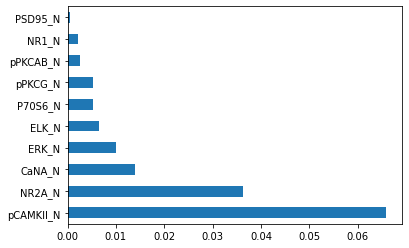

In [ ]:
feature_importance=pd.Series(perm1.importances_mean,index=X_test.columns)#printing the value of feature 
feature_importance.nlargest(10).plot(kind='barh')#plotting bargraph
plt.show()

### Model 2: RBF SVM(Multiclass classification)

In [ ]:
perm2 = permutation_importance(clf2, X_test,Y2_test,random_state=1,n_repeats=10)#defining the permute importance
for i in range(len(perm2.importances)):#defining the for loop 
    print(f"feature {i}: {perm2.importances_mean[i]}")#printing the result

feature 0: 0.006550218340611369
feature 1: 0.0
feature 2: 0.0026200873362445475
feature 3: 0.0930131004366812
feature 4: 0.0004366812227074246
feature 5: 0.2838427947598253
feature 6: 0.03711790393013098
feature 7: 0.0
feature 8: 0.0
feature 9: 0.0
feature 10: 0.003930131004366821
feature 11: 0.17729257641921398
feature 12: 0.0013100436681222738
feature 13: 0.0
feature 14: 0.0
feature 15: 0.017903930131004386
feature 16: 0.029257641921397393
feature 17: 0.002183406113537123
feature 18: 0.0
feature 19: 0.0
feature 20: 0.0
feature 21: 0.0
feature 22: 0.04017467248908295
feature 23: 0.0004366812227074246
feature 24: 0.003493449781659397
feature 25: 0.0
feature 26: 0.0
feature 27: 0.0
feature 28: 0.0
feature 29: 0.0026200873362445475
feature 30: 0.0
feature 31: 0.002183406113537123
feature 32: 0.0
feature 33: 0.013100436681222738
feature 34: 0.04192139737991265
feature 35: 0.0
feature 36: 0.018777292576419257
feature 37: 0.03624454148471614
feature 38: 0.0004366812227074246
feature 39: 0.0

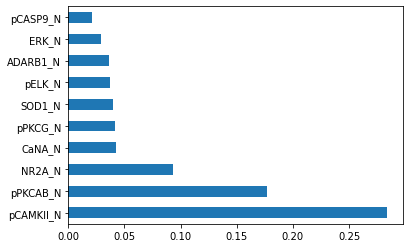

In [ ]:
feature_importance=pd.Series(perm2.importances_mean,index=X_test.columns)#printing the value of feature 
feature_importance.nlargest(10).plot(kind='barh')#plotting bargraph
plt.show()

### Model 3: Neural network(Binary)

In [ ]:
perm3 = permutation_importance(best_model_bin,X_train,Y1_train,random_state=1,n_repeats=2,scoring='accuracy')#defining the permute importance

17/17 [==============================] - 0s 2ms/step


In [ ]:
for i in range(len(perm3.importances)):#defining the for loop 
    print(f"feature {i}: {perm3.importances_mean[i]}")#printing the result

feature 0: 0.027204502814258902
feature 1: 0.0
feature 2: 0.016885553470919357
feature 3: 0.0440900562851782
feature 4: 0.0028142589118198558
feature 5: 0.012195121951219523
feature 6: 0.020637898686679146
feature 7: 0.0018761726078798668
feature 8: 0.0
feature 9: -0.0028142589118199113
feature 10: 0.014071294559099445
feature 11: 0.0
feature 12: 0.0
feature 13: 0.0009380863039399334
feature 14: 0.0
feature 15: 0.016885553470919357
feature 16: 0.015009380863039379
feature 17: 0.007504690431519689
feature 18: 0.0009380863039399334
feature 19: 0.0
feature 20: 0.004690431519699834
feature 21: 0.0206378986866792
feature 22: -0.0009380863039399889
feature 23: 0.009380863039399612
feature 24: 0.007504690431519689
feature 25: 0.0103189493433396
feature 26: 0.0056285178236397115
feature 27: 0.0065666041275797005
feature 28: 0.007504690431519689
feature 29: 0.007504690431519689
feature 30: 0.004690431519699778
feature 31: 0.008442776735459678
feature 32: 0.0009380863039399334
feature 33: -0.004

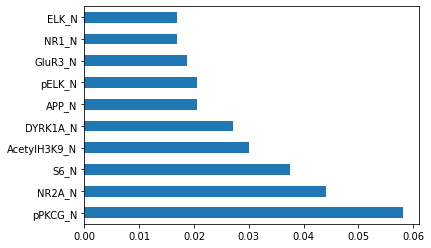

In [ ]:
feature_importance=pd.Series(perm3.importances_mean,index=X_test.columns)#printing the value of feature 
feature_importance.nlargest(10).plot(kind='barh')#plotting bargraph
plt.show()

### Model 4: Neural Network(Binary classification)

In [ ]:
perm4 = permutation_importance(best_model_multi,X_train,Y2_train,random_state=1,n_repeats=2,scoring='accuracy')#defining the permute importance

17/17 [==============================] - 0s 2ms/step


In [ ]:
for i in range(len(perm4.importances)):#defining the for loop 
    print(f"feature {i}: {perm4.importances_mean[i]}")#printing the result

feature 0: 0.0
feature 1: 0.0
feature 2: 0.0
feature 3: 0.0
feature 4: 0.0
feature 5: 0.0
feature 6: 0.0
feature 7: 0.0
feature 8: 0.0
feature 9: 0.0
feature 10: 0.0
feature 11: 0.0
feature 12: 0.0
feature 13: 0.0
feature 14: 0.0
feature 15: 0.0
feature 16: 0.0
feature 17: 0.0
feature 18: 0.0
feature 19: 0.0
feature 20: 0.0
feature 21: 0.0
feature 22: 0.0
feature 23: 0.0
feature 24: 0.0
feature 25: 0.0
feature 26: 0.0
feature 27: 0.0
feature 28: 0.0
feature 29: 0.0
feature 30: 0.0
feature 31: 0.0
feature 32: 0.0
feature 33: 0.0
feature 34: 0.0
feature 35: 0.0
feature 36: 0.0
feature 37: 0.0
feature 38: 0.0
feature 39: 0.0
feature 40: 0.0
feature 41: 0.0
feature 42: 0.0
feature 43: 0.0
feature 44: 0.0
feature 45: 0.0
feature 46: 0.0
feature 47: 0.0
feature 48: 0.0
feature 49: 0.0
feature 50: 0.0
feature 51: 0.0


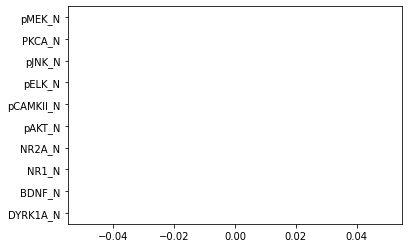

In [ ]:
feature_importance=pd.Series(perm4.importances_mean,index=X_test.columns)#printing the value of feature
feature_importance.nlargest(10).plot(kind='barh')#plotting bargraph
plt.show()

### Model 4: Random forest(Multiclass Classification)

In [ ]:
perm5 = permutation_importance(mod_up, X_test,Y1_test,random_state=1,n_repeats=10)#defining the permute importance
for i in range(len(perm5.importances)):#defining the for loop 
    print(f"feature {i}: {perm5.importances_mean[i]}")#printing the result

feature 0: 0.015720524017467284
feature 1: 0.003493449781659397
feature 2: 0.003056768558951972
feature 3: 3.3306690738754695e-17
feature 4: 0.0004366812227074468
feature 5: 0.0008733624454148492
feature 6: -0.000873362445414827
feature 7: -0.000873362445414827
feature 8: 0.004366812227074246
feature 9: 0.0008733624454148603
feature 10: 0.0004366812227074246
feature 11: 0.006986899563318794
feature 12: -0.001746724890829665
feature 13: 0.003056768558951972
feature 14: 0.0021834061135371343
feature 15: 0.01048034934497819
feature 16: 0.002183406113537123
feature 17: 0.004366812227074246
feature 18: -0.0052401746724890065
feature 19: -0.0013100436681222406
feature 20: 0.0004366812227074468
feature 21: 0.10567685589519656
feature 22: 0.005240174672489095
feature 23: 0.006986899563318804
feature 24: 0.009170305676855917
feature 25: 0.008296943231441067
feature 26: 0.006113537117903944
feature 27: 0.004366812227074246
feature 28: 0.000436681222707469
feature 29: 0.0004366812227074246
featur

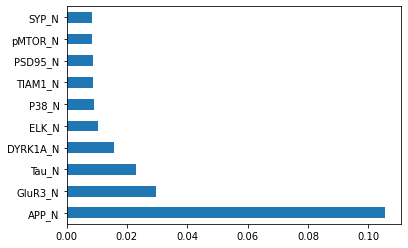

In [ ]:
feature_importance=pd.Series(perm5.importances_mean,index=X_test.columns)#printing the value of feature
feature_importance.nlargest(10).plot(kind='barh')#plotting bargraph
plt.show()

In [ ]:
perm6 = permutation_importance(mod_up_2, X,Y2,random_state=1,n_repeats=10)#defining the permute importance
for i in range(len(perm6.importances)):#defining the for loop
    print(f"feature {i}: {perm6.importances_mean[i]}")#printing the result

feature 0: -0.00039370078740160743
feature 1: -0.000656167979002642
feature 2: 0.0010498687664041383
feature 3: 0.0
feature 4: 0.0013123359580052064
feature 5: 0.0007874015748031038
feature 6: -0.000656167979002642
feature 7: 0.0011811023622046557
feature 8: 0.0003937007874015519
feature 9: 0.0003937007874015408
feature 10: -0.0005249343832021136
feature 11: 0.0009186351706036211
feature 12: 0.0001312335958005062
feature 13: 0.0
feature 14: -0.0001312335958005284
feature 15: -0.0002624671916010568
feature 16: -0.0001312335958005506
feature 17: -0.0003937007874015852
feature 18: -2.2204460492503132e-17
feature 19: -0.0005249343832021136
feature 20: 0.0
feature 21: 0.0002624671916010235
feature 22: 0.020866141732283416
feature 23: -0.0007874015748031704
feature 24: -0.0005249343832021358
feature 25: -0.0005249343832021136
feature 26: 0.0002624671916010124
feature 27: -0.0001312335958005284
feature 28: -0.0002624671916010568
feature 29: -0.0001312335958005506
feature 30: -0.00118110236220

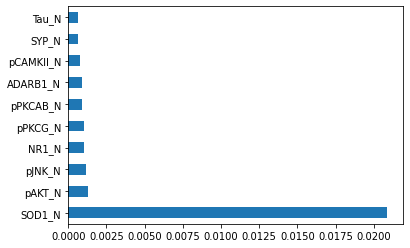

In [ ]:
feature_importance=pd.Series(perm6.importances_mean,index=X_test.columns)#printing the value of feature
feature_importance.nlargest(10).plot(kind='barh')#plotting bargraph
plt.show()

# Task 7: Recursive Feature Elimination

### Model 1: Linear SVM (Binary classification)

In [ ]:
from sklearn.feature_selection import RFE#importing the rescursive feature elimination

In [ ]:
Rec_elim_1=RFE(estimator=clf,n_features_to_select=20,step=1)#defining the rfe for linear svm
Rec_elim_1.fit(X_train,Y1_train)#fit the data


RFE(estimator=SVC(C=1000, kernel='linear'), n_features_to_select=20)

In [ ]:
X_train_remained=Rec_elim_1.transform(X_train)#tranformed the train into remaining the train data
X_test_remained=Rec_elim_1.transform(X_test)#tranforming the test data into reamining the test data

In [ ]:
#printing the shape of the dataset
print(X_train.shape)
print(X_train_remained.shape)
print(X_test_remained.shape)

(533, 52)
(533, 20)
(229, 20)


In [ ]:
clf.fit(X_train_remained,Y1_train)#fitting into the train data which remained after elimination

SVC(C=1000, kernel='linear')

In [ ]:
Y1_pred=clf.predict(X_test_remained)#predicting using the test reamined data

In [ ]:
#checking the accuracy for the data
from sklearn.metrics import accuracy_score
result1=accuracy_score(Y1_test,Y1_pred)
print('Accuracy is:',result1*100)

Accuracy is: 93.44978165938865


In [ ]:
from sklearn.metrics import classification_report#importing the f1_score
cr=classification_report(Y1_test,Y1_pred)#comparing the test and prediction
print(cr)#printing the accuracy 

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       132
           1       0.93      0.92      0.92        97

    accuracy                           0.93       229
   macro avg       0.93      0.93      0.93       229
weighted avg       0.93      0.93      0.93       229



after elimination the accuracy is 93%
before elimination the accurcay is 94%

### Model 1: Linear SVM(Multiclass classification)

In [ ]:
Rec_elim_2=RFE(estimator=clf,n_features_to_select=20,step=1)#defining the rfe for linear svm
Rec_elim_2.fit(X_train,Y2_train)#fit the data

RFE(estimator=SVC(C=1000, kernel='linear'), n_features_to_select=20)

In [ ]:
clf.fit(X_train_remained,Y2_train)#fitting into the train data which remained after elimination

SVC(C=1000, kernel='linear')

In [ ]:
Y2_pred=clf.predict(X_test_remained)#predicting using the test reamined data

In [ ]:
#checking accuracy after elmination of some feature 
from sklearn.metrics import accuracy_score
result1=accuracy_score(Y2_test,Y2_pred)
print('Accuracy is:',result1*100)

Accuracy is: 89.08296943231441


In [ ]:
from sklearn.metrics import classification_report#importing the f1_score
cr=classification_report(Y2_test,Y2_pred)#comparing the test and prediction
print(cr)#printing the accuracy 

              precision    recall  f1-score   support

           0       0.86      0.85      0.86        73
           1       0.99      0.96      0.97        70
           2       0.77      0.80      0.79        46
           3       0.93      0.95      0.94        40

    accuracy                           0.89       229
   macro avg       0.89      0.89      0.89       229
weighted avg       0.89      0.89      0.89       229



accuracy after elimination =89%
accuracy before elimnation=97%

### Model 2: RBF SVM (Binary classification)

In [ ]:
clf2=svm.SVC(kernel='rbf', C=100,gamma=0.1)#defining the kernel svm 

In [ ]:
Rec_elim_3=RFE(estimator=clf2,n_features_to_select=20,step=1)#defining the rfe for kernel svm


In [ ]:
clf2.fit(X_train_remained,Y1_train)#fitting into the train data which remained after elimination

SVC(C=100, gamma=0.1)

In [ ]:
Y1_pred=clf2.predict(X_test_remained)#predicting using the test reamined data

In [ ]:
#checking the accuracy 
from sklearn.metrics import accuracy_score
result1=accuracy_score(Y1_test,Y1_pred)
print('Accuracy is:',result1*100)

Accuracy is: 95.63318777292577


In [ ]:
from sklearn.metrics import classification_report#importing the f1_score
cr=classification_report(Y1_test,Y1_pred)#comparing the test and prediction
print(cr)#printing the accuracy 

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       132
           1       0.95      0.95      0.95        97

    accuracy                           0.96       229
   macro avg       0.96      0.96      0.96       229
weighted avg       0.96      0.96      0.96       229



In [ ]:
from sklearn.metrics import classification_report#importing the f1_score
cr=classification_report(Y1_test,Y1_pred)#comparing the test and prediction
print(cr)#printing the accuracy 

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       132
           1       0.95      0.95      0.95        97

    accuracy                           0.96       229
   macro avg       0.96      0.96      0.96       229
weighted avg       0.96      0.96      0.96       229



accuracy after elimination=96%
accurcay before elimination=97%

### Model 2: RBF SVM (Multiclass classification)

In [ ]:
Rec_elim_3=RFE(estimator=clf2,n_features_to_select=20,step=1)#defining the rfe for kernel svm

In [ ]:
clf2.fit(X_train_remained,Y2_train)#fitting into the train data which remained after elimination

SVC(C=100, gamma=0.1)

In [ ]:
Y2_pred=clf2.predict(X_test_remained)#predicting using the test reamined data

In [ ]:
#checking the accuracy 
from sklearn.metrics import accuracy_score
result1=accuracy_score(Y2_test,Y2_pred)
print('Accuracy is:',result1*100)

Accuracy is: 92.57641921397381


accuracy after elimination=92%
accuracy before elomination=100%

### Model 3: Random Forest Classifier(binary classification)


In [ ]:
Rec_elim_4=RFE(estimator=mod_up,n_features_to_select=20,step=1)#defining the rfe for random forest
Rec_elim_4.fit(X_train,Y1_train)#fitting into the train data which remained after elimination

RFE(estimator=RandomForestClassifier(max_depth=9, min_samples_split=0.1,
                                     random_state=56),
    n_features_to_select=20)

In [ ]:
#tranforming the train 
X_train_remained=Rec_elim_4.transform(X_train)

X_test_remained=Rec_elim_4.transform(X_test)

In [ ]:
#printing the shape
print(X_train.shape)
print(X_train_remained.shape)
print(X_test_remained.shape)

(533, 52)
(533, 20)
(229, 20)


In [ ]:
mod_up.fit(X_train_remained,Y1_train)#fiiting the model

RandomForestClassifier(max_depth=9, min_samples_split=0.1, random_state=56)

In [ ]:
Y1_pred=mod_up.predict(X_test_remained)#predicting the model

In [ ]:
#checking accuracy 
from sklearn.metrics import accuracy_score
result1=accuracy_score(Y1_test,Y1_pred)
print('Accuracy is:',result1*100)

Accuracy is: 92.13973799126637


In [ ]:
from sklearn.metrics import classification_report#importing the f1_score
cr=classification_report(Y1_test,Y1_pred)#comparing the test and prediction
print(cr)#printing the accuracy 

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       132
           1       0.92      0.90      0.91        97

    accuracy                           0.92       229
   macro avg       0.92      0.92      0.92       229
weighted avg       0.92      0.92      0.92       229



accuracy before elimination =93%
accuracy after elimination=92%

### Model 3: Random Forest(Multiclass classification)


In [ ]:
Rec_elim_5=RFE(estimator=mod_up_2,n_features_to_select=20,step=1)#defining the rfe for random forest
Rec_elim_5.fit(X_train,Y2_train)#fitting into the train data which remained after elimination

RFE(estimator=RandomForestClassifier(max_depth=8, min_samples_split=10),
    n_features_to_select=20)

In [ ]:
#tranforming the data
X_train_remained=Rec_elim_5.transform(X_train)
X_test_remained=Rec_elim_5.transform(X_test)

In [ ]:
mod_up_2.fit(X_train_remained,Y2_train)#fitting the model
Y2_pred=mod_up.predict(X_test_remained)#predicting the model
#checking accuracy 
from sklearn.metrics import accuracy_score
result1=accuracy_score(Y2_test,Y2_pred)
print('Accuracy is:',result1*100)

Accuracy is: 31.004366812227076


In [ ]:
from sklearn.metrics import classification_report#importing the f1_score
cr=classification_report(Y2_test,Y2_pred)#comparing the test and prediction
print(cr)#printing the accuracy 

              precision    recall  f1-score   support

           0       0.29      0.03      0.05        73
           1       0.31      0.99      0.47        70
           2       0.00      0.00      0.00        46
           3       0.00      0.00      0.00        40

    accuracy                           0.31       229
   macro avg       0.15      0.25      0.13       229
weighted avg       0.19      0.31      0.16       229



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


accuracy before elimination=97%
accuracy after elimnation=31%

# Task 8:Testing on Test Data

In [ ]:
Micetest_data=pd.read_csv("https://www.ee.iitb.ac.in/~asethi/Dump/MouseTest.csv")#reading the testing datset

In [ ]:
Micetest_data.shape#checking the shape of test data

(225, 79)

In [ ]:
Micetest_data.head()#checking information of data


,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior
0,0.627582,0.954187,0.446958,2.930717,5.915039,0.197897,0.185599,1.765115,0.232257,1.808111,...,0.120835,0.148773,0.120885,0.541241,0.121674,0.158103,NaN,1.649983,Control,Memantine_C/S
1,0.651253,0.962021,0.464964,2.992689,5.975028,0.202810,0.188473,1.807824,0.259020,1.960691,...,0.130462,0.147660,0.128960,0.525966,0.126780,0.163405,NaN,1.638988,Control,Memantine_C/S
2,0.644346,0.967179,0.470056,3.073847,5.927379,0.205131,0.182590,1.783552,0.258795,2.147883,...,0.118851,0.143169,0.129154,0.508214,0.122796,0.160293,NaN,1.564925,Control,Memantine_C/S
3,0.568229,0.812018,0.393465,2.606780,5.808102,0.218211,0.179905,2.312324,0.209154,1.733692,...,0.116218,0.140063,0.127661,0.561721,0.123122,0.156108,NaN,1.682222,Control,Memantine_C/S
4,0.587038,0.863728,0.411203,2.757975,6.006657,0.223688,0.189400,2.375283,0.218538,1.843255,...,0.142739,0.140775,0.121389,0.534845,0.133996,0.180373,NaN,1.660352,Control,Memantine_C/S


In [ ]:
Micetest_data.Genotype.unique()#checking genotype unique value 

array(['Control', 'Ts65Dn'], dtype=object)

In [ ]:
Micetest_dataup=Micetest_data.drop(labels=['Genotype','Treatment_Behavior'],axis=1)#drop the target values
Geno_test=Micetest_data['Genotype']#binary class is stored in Geno_t
Treat_test=Micetest_data['Treatment_Behavior']#multiclass is stored in Treat_B

In [ ]:
Micetest_dataup.shape#checking the shape

(225, 77)

In [ ]:
#storing the data 
X_test_final=Micetest_dataup
Y1_test_final=Geno_test
Y2_test_final=Treat_test

In [ ]:
#imputing the data
Impute=IterativeImputer()
Imputed=Impute.fit_transform(X_test_final)

In [ ]:
#checking the final shape
X_test_final.shape

(225, 77)

In [ ]:
Micetest_dataup=Micetest_dataup.drop(lowvar_columns,axis=1)#dropping low variance columns
Micetest_dataup.shape

(225, 58)

In [ ]:
Micetest_dataup=Micetest_dataup.drop(corr_features,axis=1)#dropping the correlated feature 

In [ ]:
Micetest_dataup.shape#checking the final shape 

(225, 52)

In [ ]:
X_test_final=Micetest_dataup#storing the value

In [ ]:
X_test_final.shape#checking the final shape 


(225, 52)

In [ ]:
#imputing the data
Impute=IterativeImputer()
Imputed=Impute.fit_transform(X_test_final)
X_test_final=pd.DataFrame(Imputed, columns=X_test_final.columns)



In [ ]:
#encoding the output variable 
encoder=LabelEncoder()
Y1_test_final=encoder.fit_transform(Y1_test_final)
Y2_test_final=encoder.fit_transform(Y2_test_final)

Using the random forest model on test dataset

Binary classification 

In [ ]:
mod_up=RandomForestClassifier(criterion="gini",max_depth=9,min_samples_split=0.1,random_state=56)#random forest fucntion
mod_up.fit(X_train,Y1_train)#fiting the model
  

RandomForestClassifier(max_depth=9, min_samples_split=0.1, random_state=56)

In [ ]:
Y1_pred_final=mod_up.predict(X_test_final)#prediction of model

In [ ]:
#checking the accuracy 
from sklearn.metrics import classification_report
cr=classification_report(Y1_test_final,Y1_pred_final)
print(cr)

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       135
           1       0.64      0.61      0.63        90

    accuracy                           0.71       225
   macro avg       0.69      0.69      0.69       225
weighted avg       0.70      0.71      0.71       225



In [ ]:
from sklearn.metrics import accuracy_score
result1=accuracy_score(Y1_test_final,Y1_pred_final)
print('Accuracy is:',result1*100)

Accuracy is: 70.66666666666667


for binary class the the accuracy is 70% from random forest

multiclass classification

In [ ]:
mod_up_2 = RandomForestClassifier(max_depth=8, min_samples_split=10)#defining the model with best  hyperparameter

mod_up_2.fit(X_train, Y2_train)#fitting the model 
  
# predict the mode
Y2_pred_final = mod_up_2.predict(X_test_final)

In [ ]:
from sklearn.metrics import accuracy_score
result1=accuracy_score(Y2_test_final,Y2_pred_final)
print('Accuracy is:',result1*100)

Accuracy is: 69.77777777777779


for multi class from random forest the accuracy is 70% almost for test data

In [ ]:
#checking the accuracy 
from sklearn.metrics import classification_report
cr=classification_report(Y2_test_final,Y2_pred_final)
print(cr)

              precision    recall  f1-score   support

           0       0.80      0.72      0.75        60
           1       0.70      0.58      0.64        60
           2       0.74      0.82      0.78        60
           3       0.55      0.67      0.60        45

    accuracy                           0.70       225
   macro avg       0.70      0.70      0.69       225
weighted avg       0.71      0.70      0.70       225



# Part B

## Practice using pre-trained neural networks to extract domain-specific features for new tasks 

### Used ConvNet as fixed feature extractor to classify Ant's using images

In [ ]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

cudnn.benchmark = True
plt.ion() 

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir =  '/content/drive/MyDrive/hymenoptera_data/hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f}')

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [ ]:
model_conv = torchvision.models.resnet18(pretrained=True)
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [ ]:
model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=10)

Epoch 0/9
----------
train Loss: 0.6338 Acc: 0.6352
val Loss: 0.6126 Acc: 0.7451

Epoch 1/9
----------
train Loss: 0.4663 Acc: 0.7869
val Loss: 0.2540 Acc: 0.9150

Epoch 2/9
----------
train Loss: 0.6910 Acc: 0.7295
val Loss: 0.2467 Acc: 0.9281

Epoch 3/9
----------
train Loss: 0.5223 Acc: 0.8033
val Loss: 0.3704 Acc: 0.8693

Epoch 4/9
----------
train Loss: 0.4129 Acc: 0.8320
val Loss: 0.2401 Acc: 0.9346

Epoch 5/9
----------
train Loss: 0.5720 Acc: 0.7459
val Loss: 0.2233 Acc: 0.9412

Epoch 6/9
----------
train Loss: 0.4386 Acc: 0.8320
val Loss: 0.2975 Acc: 0.8889

Epoch 7/9
----------
train Loss: 0.3349 Acc: 0.8402
val Loss: 0.2564 Acc: 0.9150

Epoch 8/9
----------
train Loss: 0.2872 Acc: 0.8811
val Loss: 0.2727 Acc: 0.8954

Epoch 9/9
----------
train Loss: 0.2644 Acc: 0.8852
val Loss: 0.2243 Acc: 0.9412

Training complete in 7m 18s
Best val Acc: 0.941176


summarize findings 


In first question of assignement which is given for the mice to see if a treatment of Down’s syndrome works or not in which there is two outcome one is genotype and other treatment bheviour.
1)first we did the exploratory data analysis in which we have removed the number of null values and feature with high correlation .also in this we have used the variance threshold to remove feature which is alomost constant data.  
2)checked that both the classes that is binary and multiclass is balanced or not .
3)use the imputation method to fill the null values.
4)train the model with using four model
  a)linear svm
      binary(accuracy=94%)
      multiclass(accuracy=98%
      
  b)kernel svm
      binary(accuracy=97%)
      multiclass(accuracy=100%)
      
   c)neural network
      binary(accuracy=81%)
      multiclass(accuracy=31%)
   d)random forest
       binary(accuracy=93%)
      multiclass(accuracy=97%) 
 5)checked the feature importance for every model .for that i had used the selectfrommodel and permuteimportance.
 6)used the recurisve feature elmination for every model and checked the accuracy .
 7)test the model with test dataset from this I got know for this datset random forest is giving 71%.
 8)learnt the image extraction and for that how to train that model for image extraction.
 9)used the resnet 18 for feature extraction from image
 By doing this assigment i learnt about the classifcation problem ,how to train and predict and improve the model with use of recursive feature elimnation .also learnt about the image extraction and training the model

References
Question 1
1)https://colab.research.google.com/drive/1Xf5rxQu0UrOLGjuScG6Eod5NeTUKbTfb?authuser=1
2)https://www.youtube.com/watch?v=uMlU2JaiOd8
3)https://www.youtube.com/watch?v=FndwYNcVe0U
4)https://stackoverflow.com/questions/67287472/how-can-i-find-whether-my-dataset-is-balanced-or-not#:~:text=In%20simple%20words%2C%20you%20need%20to%20check%20if,we%20can%20either%20oversample%20or%20undersample%20the%20data.
5)https://www.geeksforgeeks.org/count-nan-or-missing-values-in-pandas-dataframe/
Question2
1)https://www.youtube.com/watch?v=YMPMZmlH5Bo&t=587s
2)https://www.geeksforgeeks.org/count-nan-or-missing-values-in-pandas-dataframe/
Question 3
1)https://scikit-learn.org/stable/modules/impute.html
Question 4
1)https://www.youtube.com/watch?v=5vqk6HnITko&t=1207s
2)https://www.youtube.com/watch?v=aWAnNHXIKww
3)https://neptune.ai/blog/evaluation-metrics-binary-classification
Question 5
1)https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-and-model-selection
2)https://scikit-learn.org/stable/modules/grid_search.html
3)https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
4)https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/
5)https://stackoverflow.com/questions/64145366/kernel-gridsearchcv-parameters
6)https://www.analyticsvidhya.com/blog/2021/06/tune-hyperparameters-with-gridsearchcv/
Question 6
1)https://www.youtube.com/watch?v=R47JAob1xBY&t=605s
2)https://www.youtube.com/watch?v=VUvShOEFdQo
3)https://www.youtube.com/watch?v=EqLBAmtKMnQ&t=1170s
Question 7
1)https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html
2)https://www.youtube.com/watch?v=SljoN0cO95Q&t=848s
3)https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest.fit_transform
4)https://towardsdatascience.com/svm-feature-selection-and-kernels-840781cc1a6c#:~:text=Feature%20importance%20can%2C%20therefore%2C%20be%20determined%20by%20comparing,the%20not%20important%20ones%20%28which%20hold%20less%20variance%29.
5)https://machinelearningmastery.com/calculate-feature-importance-with-python/
Question 9
1)https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html
https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html
Question 10
1)http://pytorch.org/vision/main/generated/torchvision.datasets.ImageFolder.html
2)https://pytorch.org/tutorials/beginner/basics/transforms_tutorial.html
3)https://pytorch.org/docs/stable/generated/torch.div.html